In [1]:
import numpy as np 
import torch
import pandas as pd
import package.compute_procrustes as compute_procrustes
import package.dataset as dataset
import package.models as models
import package.training as training
from sklearn.model_selection import train_test_split
import importlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer
import sys
sys.path.append("/users/eleves-b/2020/aurelien.stumpf-mascles/Code/ICM_internship/visualize_neural_network")
import VisualizeNN as VisNN

/tmp/ipykernel_1093782/1628620950.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [217]:
importlib.reload(dataset)
importlib.reload(models)
importlib.reload(training)
importlib.reload(VisNN)
importlib.reload(compute_procrustes)

<module 'package.compute_procrustes' from '/users/eleves-b/2020/aurelien.stumpf-mascles/Code/ICM_internship/experiment_1/package/compute_procrustes.py'>

## Loading dataset

In [110]:
#synthetic function 
def f(x):
    return np.sum(x**2)

In [233]:
X = np.random.normal(0, 5, (1000, 10))
y = X[:,0]*X[:,1] + X[:,2]**2

In [103]:
X = np.random.normal(0, 5, (1000, 10))
y = (X[:, 0]*X[:, 1])

#add all the possible multiplications
X_mult = X.copy()
for i in range(X.shape[1]):
    for j in range(i+1, X.shape[1]):
        X_mult = np.concatenate((X_mult, (X[:, i]*X[:, j]).reshape(-1, 1)), axis=1)

In [234]:
#normalizer = Normalizer()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = torch.tensor(X_train, dtype=torch.float32)
#X_train = normalizer.fit_transform(X_train)
X_test = torch.tensor(X_test, dtype=torch.float32)
#X_test = normalizer.transform(X_test)
y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
y_test = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)

In [235]:
trainset = dataset.Dataset(X_train, y_train)
testset = dataset.Dataset(X_test, y_test)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=True)

## Training

In [239]:
layer_sizes_list = [10, 5, 5, 1]

def f(x):
    return x

model = models.Quadratic_MLP(layer_sizes_list, non_linearity="relu", initial_weights='xavier', type="regression")
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
criterion = torch.nn.MSELoss() #torch.nn.NLLLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1, weight_decay=0.01)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=50, verbose=True, factor=0.5)
training.train_model(model, trainloader, testloader, device, criterion, 1000, optimizer, scheduler=scheduler,type="regression")

Epoch 0
lr:  0.1
Training Loss
49.94874221801758
Test Loss
Loss: 30.711535186767577
-------------------------
Epoch 10
lr:  0.1
Training Loss
4.124565830230713
Test Loss
Loss: 3.8469412994384764
-------------------------
Epoch 20
lr:  0.1
Training Loss
3.018645029067993
Test Loss
Loss: 3.0612343406677245
-------------------------
Epoch 30
lr:  0.1
Training Loss
1.9310636258125304
Test Loss
Loss: 1.773485918045044
-------------------------
Epoch 40
lr:  0.1
Training Loss
3.8209484457969665
Test Loss
Loss: 6.966209259033203
-------------------------
Epoch 50
lr:  0.1
Training Loss
6.375328168869019
Test Loss
Loss: 6.7157518005371095
-------------------------
Epoch 60
lr:  0.1
Training Loss
3.363922619819641
Test Loss
Loss: 2.642827844619751
-------------------------
Epoch 70
lr:  0.1
Training Loss
2.452315418720245
Test Loss
Loss: 2.3280567359924316
-------------------------
Epoch 80
lr:  0.1
Training Loss
2.4214366054534913
Test Loss
Loss: 2.9256832885742186
-------------------------
Ep

In [229]:
layer_sizes_list = [10, 10, 10, 1]

def f(x):
    return x

model = models.Model_MLP(layer_sizes_list, non_linearity="relu", initial_weights='xavier', type="regression")
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
criterion = torch.nn.MSELoss() #torch.nn.NLLLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1, weight_decay=0.01)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=30, verbose=True, factor=0.5)
training.train_model(model, trainloader, testloader, device, criterion, 500, optimizer, scheduler=scheduler,type="regression")

Epoch 0
lr:  0.1
Training Loss
13474.3851171875
Test Loss
Loss: 9704.023203125
-------------------------
Epoch 10
lr:  0.1
Training Loss
12723.307724609374
Test Loss
Loss: 10939.647421875
-------------------------
Epoch 20
lr:  0.1
Training Loss
10665.97080078125
Test Loss
Loss: 13767.47078125
-------------------------
Epoch 30
lr:  0.1
Training Loss
8177.3744921875
Test Loss
Loss: 11791.8428125
-------------------------
Epoch 40
lr:  0.1
Training Loss
7366.6909375
Test Loss
Loss: 12341.488984375
-------------------------
Epoch 50
lr:  0.1
Training Loss
7582.119829101563
Test Loss
Loss: 14471.14248046875
-------------------------
Epoch 60
lr:  0.1
Training Loss
7640.98171875
Test Loss
Loss: 15044.0021875
-------------------------
Epoch 70
lr:  0.1
Training Loss
7213.502724609375
Test Loss
Loss: 13453.01359375
-------------------------
Epoch 80
lr:  0.1
Training Loss
6833.66349609375
Test Loss
Loss: 17413.789296875
-------------------------
Epoch 90
lr:  0.1
Training Loss
6659.290253906

In [100]:
layer_sizes_list = [10, 10, 10, 1]

def f(x):
    return x

model = models.Model_MLP(layer_sizes_list, non_linearity="relu", initial_weights='xavier',type="regression")
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
criterion = torch.nn.MSELoss() #NLLLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1, weight_decay=0.1)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=30, verbose=True, factor=0.5)
training.train_model_orthogonal(model, trainloader, testloader, device, criterion, 500, optimizer, scheduler=scheduler, type="regression")

Epoch 0
lr:  0.1
Training Loss
18.29345500946045
Test Loss
Loss: 16.590010681152343
-------------------------
Epoch 10
lr:  0.1
Training Loss
9.706488418579102
Test Loss
Loss: 11.657128982543945
-------------------------
Epoch 20
lr:  0.1
Training Loss
8.326936979293823
Test Loss
Loss: 12.704362411499023
-------------------------
Epoch 30
lr:  0.1
Training Loss
7.402637977600097
Test Loss
Loss: 11.345416641235351
-------------------------
Epoch 40
lr:  0.1
Training Loss
7.4104482936859135
Test Loss
Loss: 13.361377029418945
-------------------------
Epoch 50
lr:  0.1
Training Loss
6.875385208129883
Test Loss
Loss: 11.040771026611328
-------------------------
Epoch 60
lr:  0.1
Training Loss
6.410595893859863
Test Loss
Loss: 10.847349243164063
-------------------------
Epoch 70
lr:  0.1
Training Loss
6.537327117919922
Test Loss
Loss: 6.999966201782226
-------------------------
Epoch 80
lr:  0.1
Training Loss
6.074495158195496
Test Loss
Loss: 6.703395843505859
-------------------------
Epo

In [15]:
layer_sizes_list = [10, 10, 10, 2]

def f(x):
    return x

model = models.Model_MLP(layer_sizes_list, non_linearity="relu", initial_weights='xavier',type="classification")
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
criterion = torch.nn.NLLLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1, weight_decay=0)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=20, verbose=True, factor=0.5)
training.train_model_orthonormal(model, trainloader, testloader, device, criterion, 300, optimizer, scheduler=scheduler, type="classification")

Epoch 0
lr:  0.1
25.45027196407318
Training Loss
Accuracy: 64.5
Loss: 0.020905283764004707
Test Loss
Accuracy: 65.0
Loss: 0.022539880573749543
-------------------------


Epoch 10
lr:  0.1
12.77384102344513
Training Loss
Accuracy: 64.875
Loss: 0.021776388213038445
Test Loss
Accuracy: 72.5
Loss: 0.021932964622974397
-------------------------
Epoch 20
lr:  0.1
14.018135845661163
Training Loss
Accuracy: 59.25
Loss: 0.023496062085032462
Test Loss
Accuracy: 68.0
Loss: 0.022854183912277223
-------------------------
Epoch 30
lr:  0.1
15.594249814748764
Training Loss
Accuracy: 59.5
Loss: 0.022534137517213823
Test Loss
Accuracy: 68.5
Loss: 0.02287586748600006
-------------------------
Epoch 40
lr:  0.05
12.316976189613342
Training Loss
Accuracy: 69.0
Loss: 0.019084163196384906
Test Loss
Accuracy: 73.0
Loss: 0.01850002780556679
-------------------------
Epoch 50
lr:  0.05
11.894141525030136
Training Loss
Accuracy: 67.625
Loss: 0.019748670607805253
Test Loss
Accuracy: 74.5
Loss: 0.019072307199239733
-------------------------
Epoch 60
lr:  0.05
11.834800362586975
Training Loss
Accuracy: 67.375
Loss: 0.020759972631931304
Test Loss
Accuracy: 77.0
Loss: 0.018746235966

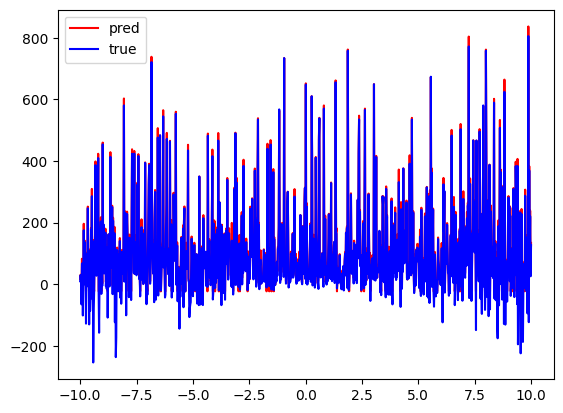

In [241]:
tab = np.concatenate([np.linspace(-10,10,1000).reshape(-1,1), np.random.normal(0, 10, (1000,9))], axis=1)
y = np.array([x[0]*x[1] + x[2]**2 for x in tab])
tab = torch.tensor(tab, dtype=torch.float32)
tab = tab.to(device)
model.eval()
pred = model(tab).detach().cpu().numpy()
plt.plot(np.linspace(-10,10,1000), pred, label='pred', color='red')
plt.plot(np.linspace(-10,10,1000), y, label='true', color='blue')
plt.legend()
plt.show()

## Visualization 

In [208]:
x = torch.tensor(np.random.normal(0, 5, (1, 10)), dtype=torch.float32)
print(x)
x = x.to(device)
model.eval()
pred = model(x).detach().cpu().numpy()
print(pred)

tensor([[ 2.1398,  7.2054,  0.3961, -1.4537, -0.2782, -1.1926, -0.5748, -4.1836,
          0.5136,  0.7212]])
[[-154376.36]]


W1


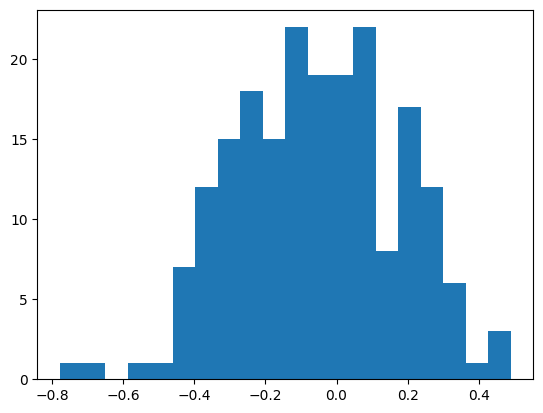

W2


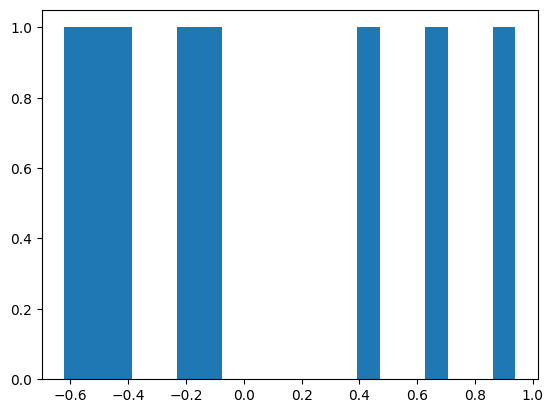

W3


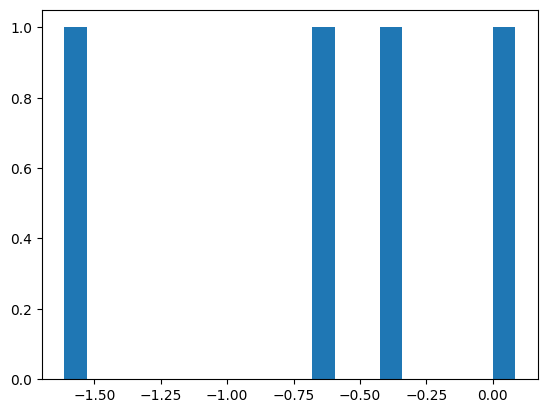

In [194]:
for layer in model.named_parameters():
    weights = layer[1].data.cpu().numpy()
    print(f'{layer[0]}')
    plt.hist(weights.flatten(), bins=20)
    plt.show()

layer0
degree_out


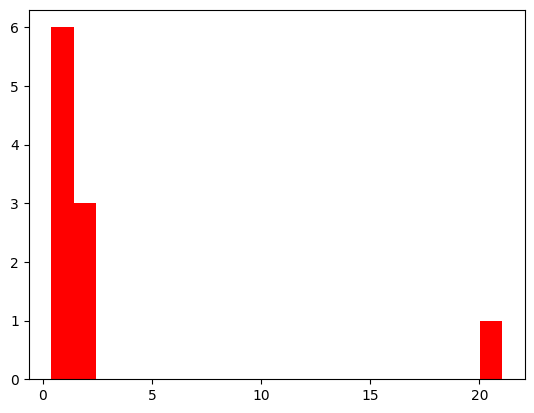

layer1
degree_in


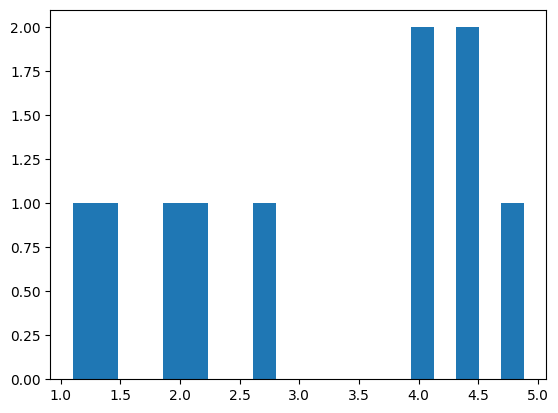

degree_out


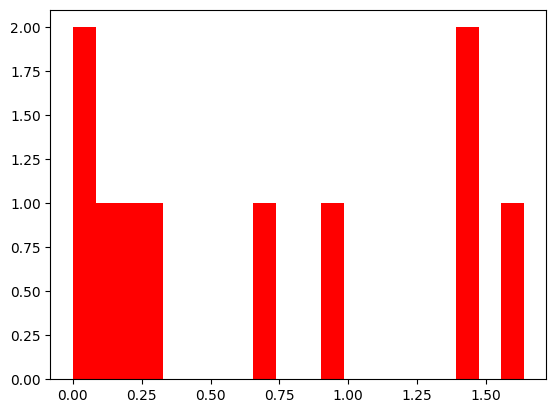

layer2
degree_in


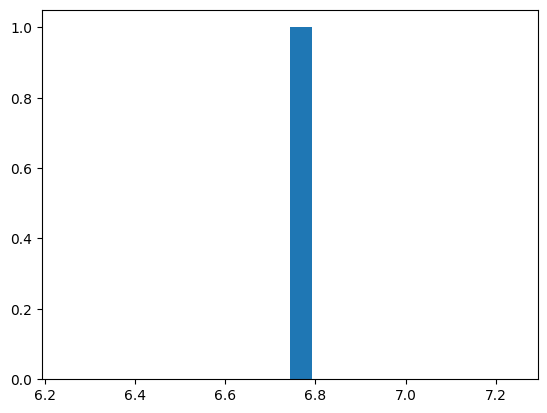

In [ ]:
i=0
for layer in model.named_parameters():
    weights = layer[1].data.cpu().numpy()
    if len(weights.shape) > 1:
        if i == 0:
            print("layer{}".format(i))
        degree_out = np.sum(np.abs(weights), axis=0)
        print("degree_out")
        plt.hist(degree_out, bins=20, color='red')
        plt.show()
        i += 1
        if i > 0:
            print("layer{}".format(i))
        print("degree_in")
        degree_in = np.sum(np.abs(weights), axis=1)
        plt.hist(degree_in, bins=20)
        plt.show()

layer0
degree_out


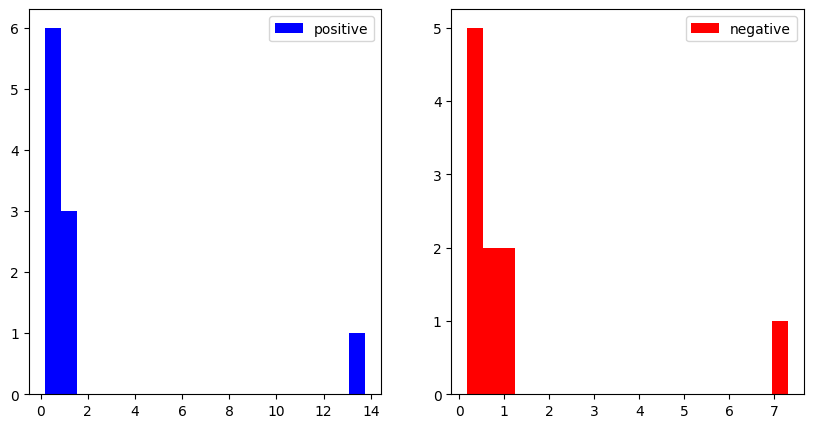

layer1
degree_in


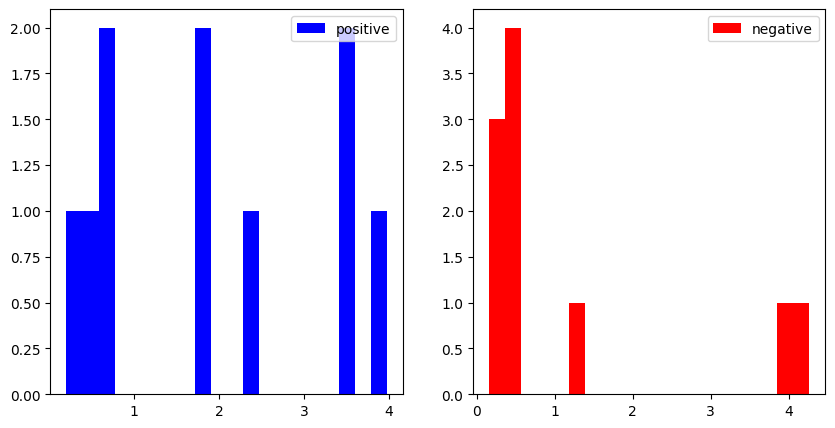

degree_out


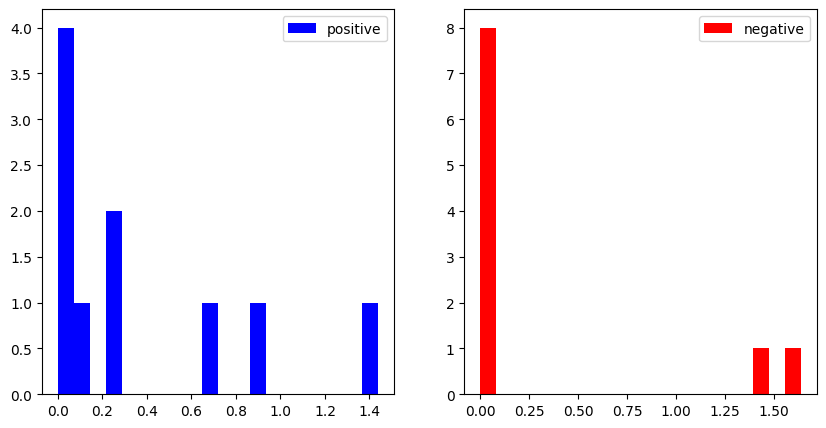

layer2
degree_in


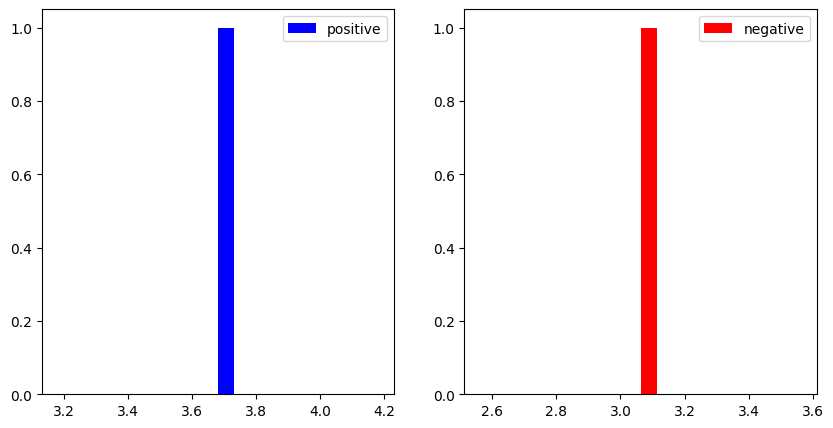

In [ ]:
i=0
for layer in model.named_parameters():
    weights = layer[1].data.cpu().numpy()
    if len(weights.shape) > 1:
        neg_weights = np.copy(weights)
        neg_weights[neg_weights > 0] = 0
        pos_weights = np.copy(weights)
        pos_weights[pos_weights < 0] = 0
        if i == 0:
            print("layer{}".format(i))
        print("degree_out")
        degree_out_neg = np.sum(np.abs(neg_weights), axis=0)
        degree_out_pos = np.sum(np.abs(pos_weights), axis=0)
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        plt.hist(degree_out_pos, bins=20, color='blue')
        plt.legend(['positive'])
        plt.subplot(1,2,2)
        plt.hist(degree_out_neg, bins=20, color='red')
        plt.legend(['negative'])
        plt.show()
        i += 1
        if i > 0:
            print("layer{}".format(i))
        print("degree_in")
        degree_in_neg = np.sum(np.abs(neg_weights), axis=1)
        degree_in_pos = np.sum(np.abs(pos_weights), axis=1)
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        plt.hist(degree_in_pos, bins=20, color='blue')
        plt.legend(['positive'])
        plt.subplot(1,2,2)
        plt.hist(degree_in_neg, bins=20, color='red')
        plt.legend(['negative'])
        plt.show()

layer0
degree_out


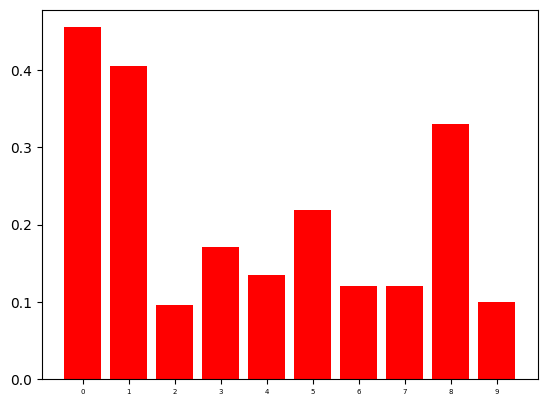

layer1
degree_in


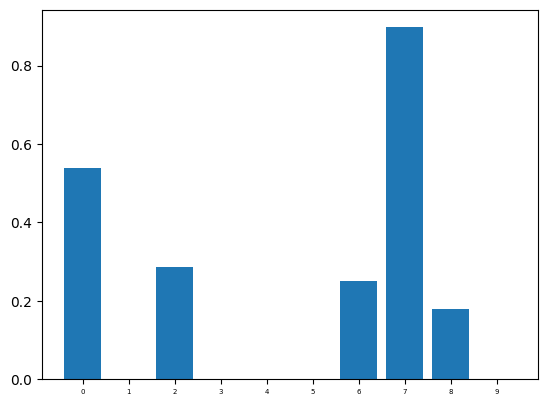

degree_out


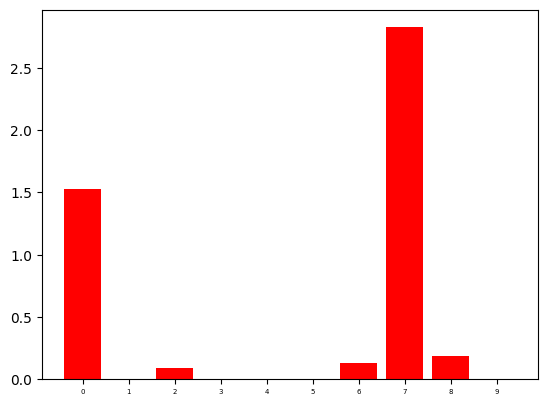

layer2
degree_in


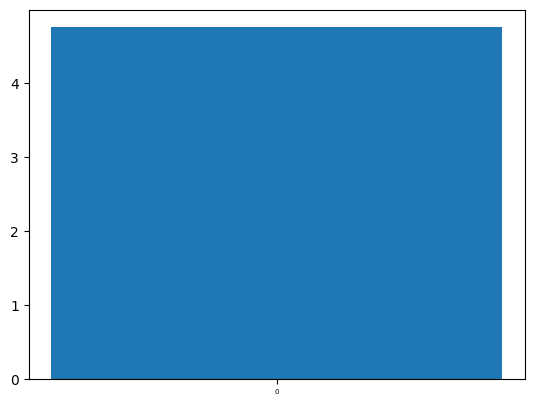

In [ ]:
i=0
for layer in model.named_parameters():
    weights = layer[1].data.cpu().numpy()
    if len(weights.shape) > 1:
        if i == 0:
            print("layer{}".format(i))
        degree_out = np.sum(np.abs(weights), axis=0)
        print("degree_out")
        plt.bar(np.arange(weights.shape[1]),degree_out, color='red')
        plt.xticks(np.arange(weights.shape[1]), rotation=0, fontsize=5)
        plt.show()
        i += 1
        if i > 0:
            print("layer{}".format(i))
        print("degree_in")
        degree_in = np.sum(np.abs(weights), axis=1)
        plt.bar(np.arange(weights.shape[0]),degree_in)
        plt.xticks(np.arange(weights.shape[0]), rotation=0, fontsize=5)
        plt.show()

layer0
degree_out


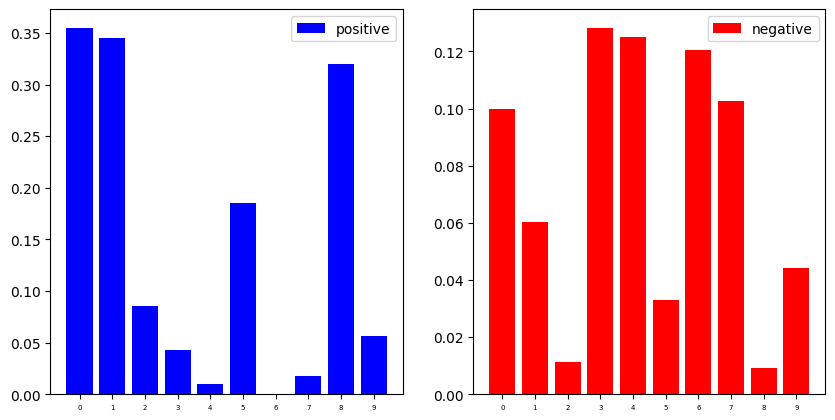

layer1
degree_in


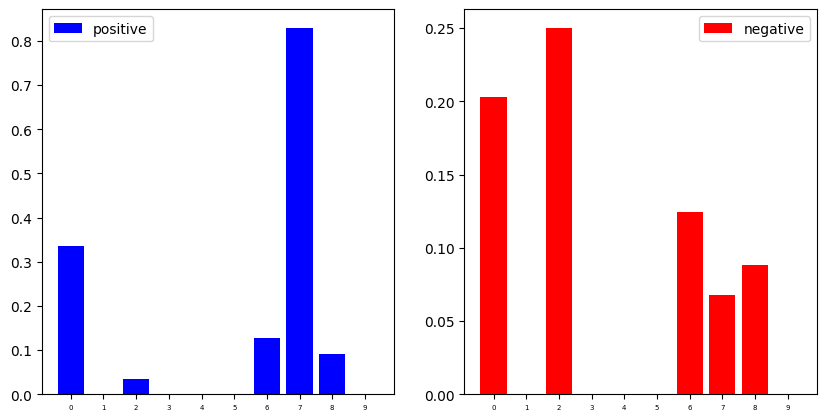

degree_out


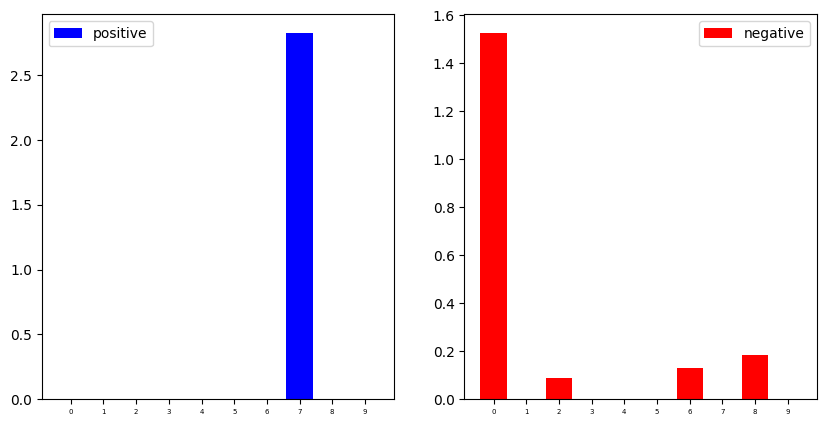

layer2
degree_in


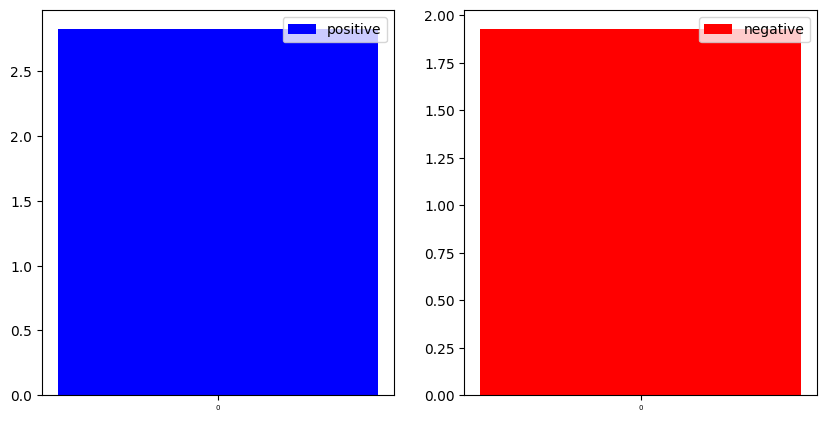

In [ ]:
i=0
for layer in model.named_parameters():
    weights = layer[1].data.cpu().numpy()
    if len(weights.shape) > 1:
        if i == 0:
            print("layer{}".format(i))
        neg_weights = np.copy(weights)
        neg_weights[neg_weights > 0] = 0
        pos_weights = np.copy(weights)
        pos_weights[pos_weights < 0] = 0
        print("degree_out")
        degree_out_neg = np.sum(np.abs(neg_weights), axis=0)
        degree_out_pos = np.sum(np.abs(pos_weights), axis=0)
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        plt.bar(np.arange(weights.shape[1]),degree_out_pos, color='blue')
        plt.xticks(np.arange(weights.shape[1]), rotation=0, fontsize=5)
        plt.legend(['positive'])
        plt.subplot(1,2,2)
        plt.bar(np.arange(weights.shape[1]),degree_out_neg, color='red')
        plt.xticks(np.arange(weights.shape[1]), rotation=0, fontsize=5)
        plt.legend(['negative'])
        plt.show()
        i += 1
        if i > 0:
            print("layer{}".format(i))
        print("degree_in")
        degree_in_neg = np.sum(np.abs(neg_weights), axis=1)
        degree_in_pos = np.sum(np.abs(pos_weights), axis=1)
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        plt.bar(np.arange(weights.shape[0]),degree_in_pos, color='blue')
        plt.xticks(np.arange(weights.shape[0]), rotation=0, fontsize=5)
        plt.legend(['positive'])
        plt.subplot(1,2,2)
        plt.bar(np.arange(weights.shape[0]),degree_in_neg, color='red')
        plt.xticks(np.arange(weights.shape[0]), rotation=0, fontsize=5)
        plt.legend(['negative'])
        plt.show()

# Visualization

In [7]:
def get_model_params(model):
    params = []
    for layer in model.named_parameters():
        if "weight" in layer[0]:
            params.append(layer[1].cpu().detach().numpy().T)
    return params

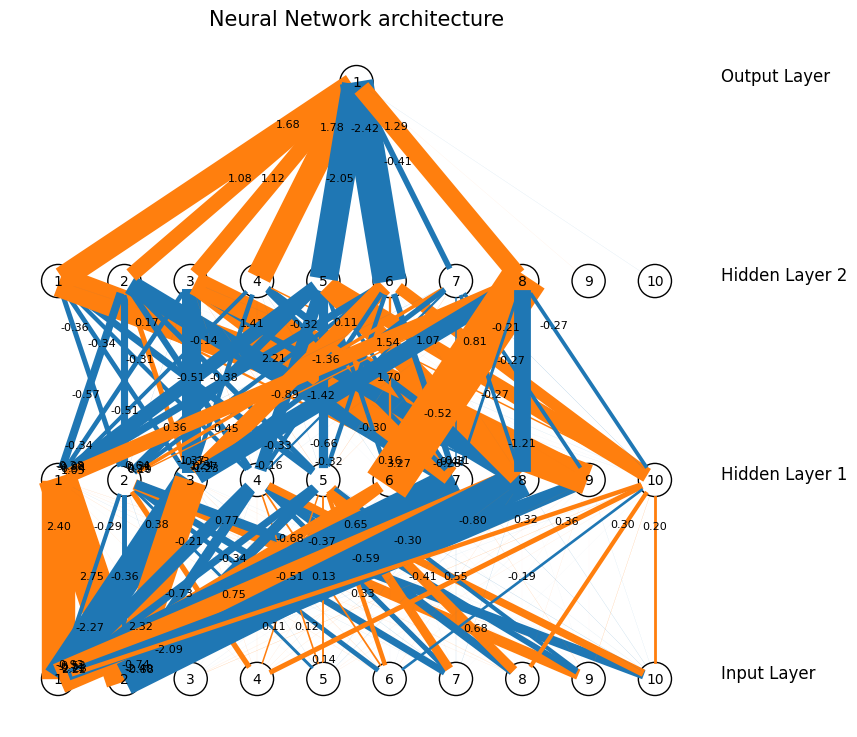

In [109]:
l = get_model_params(model)
network_structure = layer_sizes_list
network=VisNN.DrawNN(network_structure, l, 0.1, 10)
network.draw()

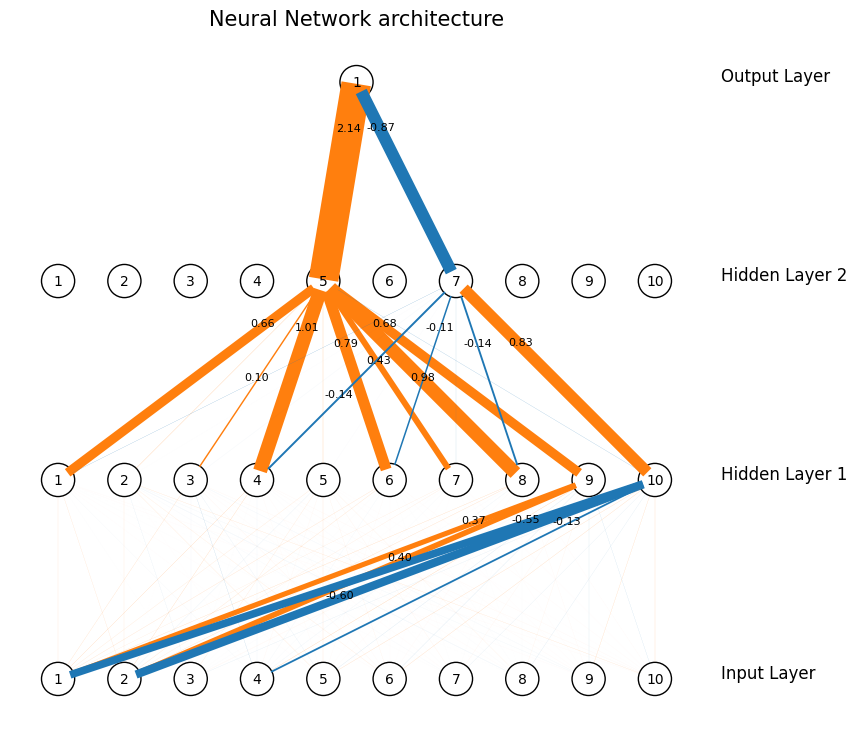

In [92]:
l = get_model_params(model)
network_structure = layer_sizes_list
network=VisNN.DrawNN(network_structure, l, 0.1, 10)
network.draw()

In [32]:
for layer in model.named_parameters():
    W = layer[1].data.cpu().numpy()
    print(W @ W.T)

[[ 2.4870118e-01  1.2936613e-09  5.2880034e-11  4.7473145e-09
  -2.1863642e-09 -2.2504105e-09  5.5440874e-09 -4.6639248e-11
  -8.4105523e-10 -6.2615393e-09]
 [ 1.2936613e-09  2.1619324e-01 -2.7838289e-09  5.4318821e-09
   2.9860516e-09 -6.4033107e-10 -5.9874661e-09 -6.0618013e-09
   6.9330497e-10 -7.4380846e-10]
 [ 5.2880034e-11 -2.7838289e-09  1.8004459e-01  3.2951406e-09
  -4.4646438e-09 -1.3156443e-09  4.4166901e-09 -3.0538512e-09
   2.2356517e-09 -1.7901258e-10]
 [ 4.7473145e-09  5.4318821e-09  3.2951406e-09  3.2979512e-01
  -8.4235996e-10 -2.5191693e-09  1.6863151e-09  4.9959072e-09
   1.2487362e-09 -3.1719682e-09]
 [-2.1863642e-09  2.9860516e-09 -4.4646438e-09 -8.4235996e-10
   3.4401336e-01  2.2257782e-09  3.7707815e-09 -2.8192617e-09
   2.8701379e-09  1.6097702e-10]
 [-2.2504105e-09 -6.4033107e-10 -1.3156443e-09 -2.5191693e-09
   2.2257782e-09  2.2611775e-02  2.2051341e-09  3.1081854e-10
   8.9528385e-10 -5.5898164e-10]
 [ 5.5440874e-09 -5.9874661e-09  4.4166901e-09  1.6863151e

In [ ]:
importlib.reload(compute_procrustes)
from scipy.stats import ortho_group

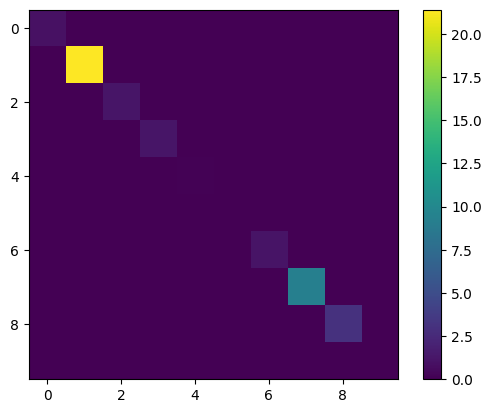

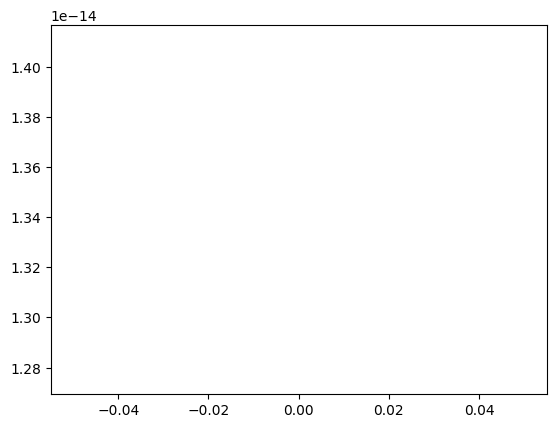

In [ ]:
W = ortho_group.rvs(10) @ np.diag(np.random.normal(0, 1, 10)**2)
A,li = compute_procrustes.compute_procrustes(W)
plt.imshow(A.T @ A)
plt.colorbar()
plt.show()
plt.plot(li[:10])

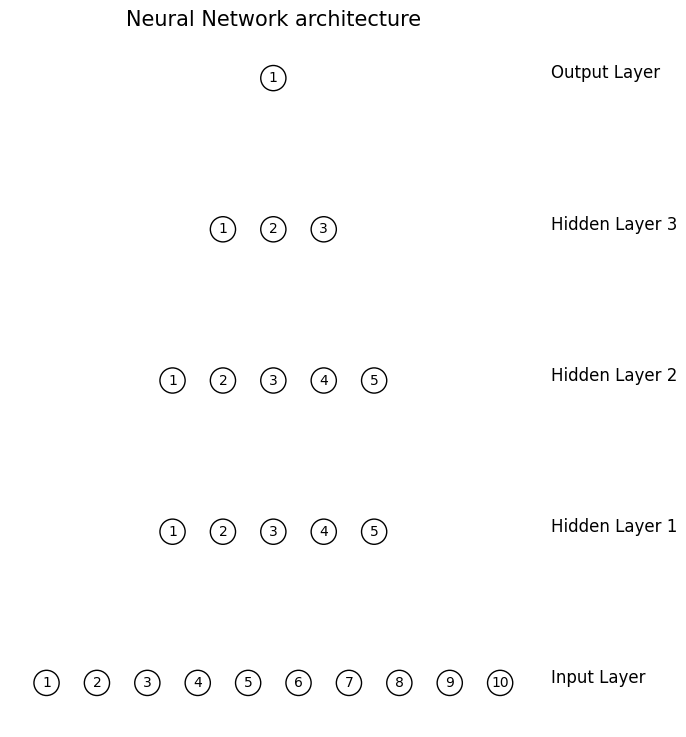

In [ ]:
l = get_model_params(model)
network_structure = layer_sizes_list
network=VisNN.DrawNN(network_structure, l, 0.2, 10)
network.draw()